<a href="https://colab.research.google.com/github/jsumbo/intro-to-ml-summative/blob/main/Summative_Intro_to_ml_Jallah_Sumbo_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency.

A Notebook detailing the following

* Project name
* Clear out puts from cells

**Instructions**
1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo


---




# Libraries

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from xgboost import XGBClassifier

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data

---

For this project, I'll use the Adult Income Dataset (also known as the "Census Income" dataset). This dataset contains information about individuals' income levels based on various features such as age, education, occupation, and more. The goal is to predict whether an individual's income exceeds $50,000 per year. The dataset can be found in the UCI Machine Learning Repository: [Adult Income Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

In [ ]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, sep=',\s', na_values=["?"], engine='python')

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Simple Neural Network Model (No Optimization Techniques)

In [ ]:
# Define a simple neural network model without optimization techniques
def simple_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the simple model
simple_model = simple_model()
simple_history = simple_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the simple model
simple_loss, simple_accuracy = simple_model.evaluate(X_test, y_test)
print(f"Simple Model Test Accuracy: {simple_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7784 - loss: 0.4489 - val_accuracy: 0.8392 - val_loss: 0.3421
Epoch 2/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8387 - loss: 0.3412 - val_accuracy: 0.8402 - val_loss: 0.3346
Epoch 3/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8432 - loss: 0.3287 - val_accuracy: 0.8432 - val_loss: 0.3329
Epoch 4/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8465 - loss: 0.3220 - val_accuracy: 0.8450 - val_loss: 0.3322
Epoch 5/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8432 - loss: 0.3303 - val_accuracy: 0.8468 - val_loss: 0.3342
Epoch 6/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8458 - loss: 0.3300 - val_accuracy: 0.8445 - val_loss: 0.3344
Epoch 7/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8497 - loss: 0.3180 - val_accuracy: 0.8449 - val_loss: 0.3327
Epoch 8/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8483 - loss: 0.3180 - val_accuracy: 0.

# Neural Network Models with Optimization Techniques

In [ ]:
# Define a function to create models with optimization techniques
def define_model(optimizer, regularization, early_stopping, dropout, learning_rate, layers):
    model = Sequential()
    for units in layers:
        model.add(Dense(units, activation='relu', kernel_regularizer=regularization))
        if dropout:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model 1: Adam optimizer, L2 regularization, Early stopping
model_1 = define_model(Adam, l2(0.01), True, 0.2, 0.001, [64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_1 = model_1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Model 2: RMSprop optimizer, L1 regularization, No Early stopping
model_2 = define_model(RMSprop, l1(0.01), False, 0.2, 0.001, [64, 32])
history_2 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Model 3: Custom combination
model_3 = define_model(Adam, l1(0.01), True, 0.3, 0.01, [128, 64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_3 = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Model 4: Another custom combination
model_4 = define_model(RMSprop, l2(0.01), True, 0.2, 0.001, [256, 128, 64])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_4 = model_4.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.7836 - loss: 0.8478 - val_accuracy: 0.8351 - val_loss: 0.4419
Epoch 2/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8273 - loss: 0.4342 - val_accuracy: 0.8329 - val_loss: 0.4002
Epoch 3/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8332 - loss: 0.3989 - val_accuracy: 0.8405 - val_loss: 0.3928
Epoch 4/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8336 - loss: 0.3913 - val_accuracy: 0.8306 - val_loss: 0.3886
Epoch 5/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8381 - loss: 0.3884 - val_accuracy: 0.8386 - val_loss: 0.3751
Epoch 6/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8374 - loss: 0.3760 - val_accuracy: 0.8434 - val_loss: 0.3707
Epoch 7/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8363 - loss: 0.3803 - val_accuracy: 0.8430 - val_loss: 0.3755
Epoch 8/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8348 - loss: 0.3750 - val_accuracy: 

# Evaluate and Compare Models

In [ ]:
# Evaluate each model on the test set
models = [simple_model, model_1, model_2, model_3, model_4]
histories = [simple_history, history_1, history_2, history_3, history_4]
model_names = ['Simple Model', 'Model 1', 'Model 2', 'Model 3', 'Model 4']

results = []
for model, history, name in zip(models, histories, model_names):
    loss, accuracy = model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results.append((name, accuracy, f1, recall, precision, roc_auc))

# Print results
for result in results:
    print(f"Model: {result[0]}")
    print(f"Accuracy: {result[1]}")
    print(f"F1 Score: {result[2]}")
    print(f"Recall: {result[3]}")
    print(f"Precision: {result[4]}")
    print(f"ROC AUC: {result[5]}")
    print()

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8446 - loss: 0.3342
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.3858
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8116 - loss: 0.4670
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7437 - loss: 0.6699
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 56/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.3914

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3842
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model: Simple Model
Accuracy: 0.8458478450775146
F1 Score: 0.6757322175732218
Recall: 0.6333333333333333
Precision: 0.7242152466367713
ROC AUC: 0.7756939817899179

Model: Model 1
Accuracy: 0.8402121663093567
F1 Score: 0.6090835360908353
Recall: 0.49084967320261436
Precision: 0.8023504273504274
ROC AUC: 0.7248829756197394

Model: Model 2
Accuracy: 0.8206530809402466
F1 Score: 0.49953746530989823
Recall: 0.35294117647058826
Precision: 0.8544303797468354
ROC AUC: 0.6662551762877036

Model: Model 3
Accuracy: 0.7463948130607605
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
ROC AUC: 0.5

Model: Model 4
Accuracy: 0.8422012329101562
F1 Score: 0.6757493188010899
Recall: 0.6483660130718955
Precision: 0.705547652916074
ROC AUC: 0.7782136527717904



# Error Analysis

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


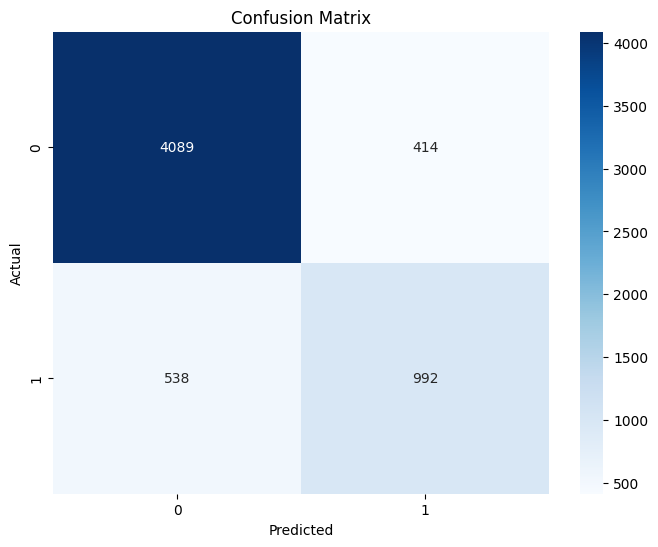

In [ ]:
# Plot confusion matrix for the best model
best_model = model_4
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save Models

In [ ]:
simple_model.save('saved_models/simple_model.h5')
model_1.save('saved_models/model_1.h5')
model_2.save('saved_models/model_2.h5')
model_3.save('saved_models/model_3.h5')
model_4.save('saved_models/model_4.h5')